In [1]:
%matplotlib inline #just so we can see plots 

## Task: Plot random white noise 
Suppose we want to plot some random points from a a random nomral distribution. 

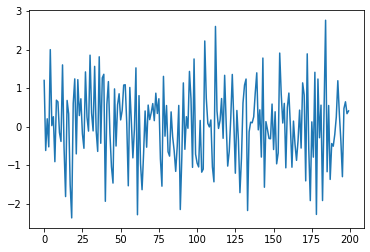

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

random_values = np.random.randn(200)
plt.plot(random_values)
plt.show()

## Imports 

The top two lines of the program 'import' functions from external code libraries. 
A library is an open source code base used to 'simplify' or take the work load off of a user. 
Here we use **Numpy**, a favourite of python users that is usefull for

- arrays (vectors and matricies) 
- mathematical functions (cosine, sine, exponential) 
- generating random numbers 
- linear algebra 

We could have used the internal python library, *random*, however **Numpy** is very robust, and we do not want to mix data types in the future, so might as well stick to one library for all math calculations. 

After importing using the line `import numpy as np`, we can then access functions / atributes from numpy by the syntax `np.attribute`. 

Other examples include: 

In [4]:
np.log(4)

1.3862943611198906

In [5]:
np.exp(5)

148.4131591025766

We could have imported using another syntax: 

In [6]:
import numpy 

numpy.sqrt(25)

5.0

or

In [9]:
from numpy import sqrt
sqrt(25)

5.0

Often we are importing lots of libraries, since the core python language is small (on purpose). 

### Packages 

NumPy is a package. Packages are made by developers who want to share their code. 
A package is really just a directory (folder) that contains: 

- files with code (modules) 
- compiled code that can be accessed by Python 
- a file called __init__.py that expaines what will be executed when one uses `import name_of_package` 

One can find the directory for the package if you look around in your python distribution. 

#### Subpackages

Above we used the line `random_values = np.random.randn(200)`. 

`np` refers to the package NumPy, whereas `random` is a **subpackage** of NumPy. 

Subpackages are just smaller packages built into a package (turtles all the way down). 

As we saw above, functions can be directly imported from packages, however I do not recommend this. 
 
The reason being is that maybe you use the `sqrt` a few times in a program, then hand it off to another reader or your boss. He/She read through it and wonder where your sqrt function is coming from. Therefore it is imo better to just use `import numpy as np` and call subpackages and functions from there.

Returning to the program, the remaining lines after the imports are: 

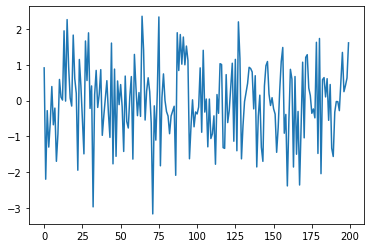

In [10]:
random_values = np.random.randn(200)
plt.plot(random_values)
plt.show()

The first line creates 100 (quasi) independent values from a standard normal and stores them in the variable `random_values`. We could have named `random_values` anything. 

The next two lines create the plot. 

### Alternatives 

So we can try to write some alternative version of the first program above. 
This will illucidate more Python syntaxes. 

## For loop

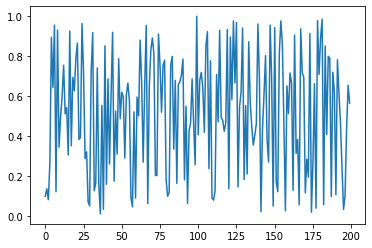

In [11]:
num_samples = 200 
random_values = [] # an empty list 

for i in range(num_samples):
    a = np.random.rand()
    random_values.append(a) 
    
plt.plot(random_values)
plt.show()

* First line creates a variable that has integer value 200. It will be the length of our time series 
* Next line creates an **empty** list named `random_values` that will store each random value as we generate them 
* `# an empty list` is a comment, i.e., anything with *#* before it in Python is not read 
* The next three lines use a **for** loop that repeatedly draws a new random number **a** and appends (adds at the end) to the list `random_values`. 
* The last two lines create the plot as usual. 

### Lists 

We talked about data structures in a previous lecture but lets review. 

Lists are a native python data structure, that is a collection of objects. 


In [19]:
b = [10, 'hello', False]
type(b)

list

What are the types of each element in `b`? 

We can also add elements to a list using the syntax `name_list.append(element)`

In [20]:
b

[10, 'hello', False]

In [21]:
b.append(2.5)
b

[10, 'hello', False, 2.5]

`append()` is a *method*, i.e., a function attached to an object, in this case the list `b`. 

Methods in essence are 
- Python objects such a lists, strings, tuples, dicts, all have methods that are used to manipualte the data within the object. 
- list objects have list methods, string objects have string methods, etc. 

If you are ever wondering what you can do with a data type, just google 'python list methods' and the documentation will tell you. 

We will examine another, which is `pop()` it removes the last element in a list. 


In [22]:
b

[10, 'hello', False, 2.5]

In [23]:
b.pop()

2.5

In [24]:
b

[10, 'hello', False]

Lists are 'zero' based, i.e., the elements are indexed starting with the number 0. i.e., `b[0]` gives us the first element of the list

In [25]:
b[0]

10

In [26]:
b[1]

'hello'

### Looping is fun! 

`for` loops are used alot. 
basically, what happens underneath and indented within a `for` loop is called a **code block**. 
Before moving on, the loop continously runs whatever is in the code block .

Another example is: 

In [27]:
languages = ['French', 'German', 'Russian']
for language in languages:
    print(language + ' is spoken around the world')

French is spoken around the world
German is spoken around the world
Russian is spoken around the world


The overall structure of for loops are: 

    for variable_name in sequence: 
        <code block> 
        
Something to briefly comment on is the indenting. 
- You must indent the next line that follows a colon. 
    - `for i in range(100):`
    - `if a > b:`
    - `while x < 5:`
    - etc. 
- All lines in a code block (after the colon) must have the same indentation
- use tab to indent. 


### While 

Instead of a for loop we could have used a while loop. 


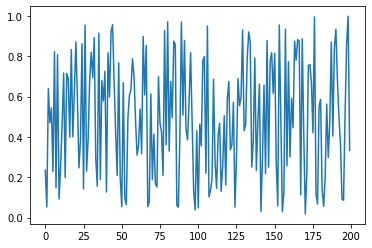

In [28]:
num_samples = 200 
random_values = []
i = 0 
while i < num_samples:
    a = np.random.rand()
    random_values.append(a)
    i += 1 # i = i + 1, i.e., increment i by one 

plt.plot(random_values) 
plt.show()

Lets do another example before we try out some excercises. 

Lets try to plot the balance of a bankc account over time. 

No withradwals over a time period of length *T* 
The initial balance is *b* and has an interest rate of *r*. 
The balance is updated from time period *t* to *t + 1* using the equation $b_{t+1} = (1 + r)b_t$ 

In the code below we create and plot the sequence of balances. Instead of using a list to store the sequence we use a NumPy array. 

The function `np.empty(length)` will allocated the memory needed, such that we do not have to use `append` but rather just fill the empty elements.  

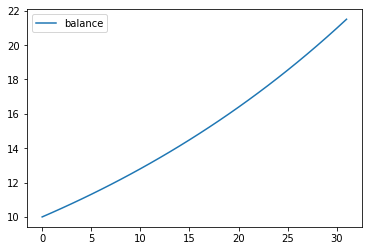

In [31]:
r = 0.025 # interest 
T = 31
b = np.empty(T + 1) # an empty numpy array to store all of the balances 
b[0] = 10 # the initial balance 

for t in range(T):
    b[t+1] = (1 + r)*b[t] 

plt.plot(b, label='balance')
plt.legend()
plt.show()

Lets do some practice. 

## Excercise 1

Simulate a correlated time series represented by the equation: 
$x_{t+1} = \alpha x_t$ 
where 
x0 = 0, 
$\alpha$ = 0.5, 
and $t \in [0, T]$

In [34]:
import numpy as np 
import matplotlib.pyplot as plt

## Excercise 2

Use the same function above, but this time plot with three different values of a,
a = 0,
a = 0.8, 
a = 0.98 

Use a `for` loop to step through the a values, 
and use `plt.legend()` to label the lines. 

## Excercise 3

Similar to previous excercises, lets plot the time series: 

$x_{t+1} = \alpha |x_t| + \epsilon_t$ where $x_0 = 0$ and $t \in [0, T]$

Use $T=200$, $\alpha = 0.9$ and $\epsilon_t$ a sample from an array of random values as we did in the first excercise. 

Find a Numpy function online that gives the absolute value of a value. 


## Excercise 4

If-else statements (or logic) are very useful in Python. 

For example, the code below prints a -1 for each negative number in an array and 1 for each nonnegative number. 

In [35]:
numbers = [-10, 1, 2.3, -5.7, 0]

for x in numbers:
    if x < 0:
        print(-1) 
    else: 
        print(1)

-1
1
1
-1
1


Now write a solution to to excercise 3 that does not use the numpy function `np.abs()`, but rather uses this kind of syntax to compute the absolute value. 

## Excercise 5

A harder example but you are an economics student so you should know monte carlo methods. 

Estimate $\pi$ using Monte Carlo. Use no other imports other than numpy

Hints: 

- If $U$ is a uniform random variable on the unit square $(0, 1)^2$, then the probabilitiy that $U$ lies in a subset $A$ of $(0,1)^2$ is equal to the area of $A$
- If $U_1, U_2, \dots, U_n$ are all identical copies of $U$ then as $n$ gets large, the fraction that falls in $A$ converges to the probability of landing in $A$. 
- For a circle, $area = \pi*radius^2$